In [1]:
import hydra
from omegaconf import OmegaConf
from glob import  glob
from rosa import  predict


BASE_DIR = "/Users/nsofroniew/Documents/data/rosa/outputs/2023-01-31/20-04-48"
config_dir = BASE_DIR + "/.hydra"

with hydra.initialize_config_dir(config_dir=config_dir):
    cfg = hydra.compose(config_name="config", overrides=OmegaConf.load(config_dir + "/overrides.yaml"))

    chkpts = BASE_DIR + "/checkpoints/*.ckpt"
    chkpt = glob(chkpts)[1]

    adata = predict(cfg, chkpt)

display(adata)

Global seed set to 0
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)
/var/folders/6n/b_zkz2ns3_l02s3g4lnlklxr0000gq/T/ipykernel_3353/883935332.py:10: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume d

RosaLightningModule(
  (model): RosaJointModel(
    (main): Sequential(
      (dual_embed): ParallelEmbed(
        (models): ModuleList(
          (0): Sequential(
            (layer_norm_0): LayerNorm((110,), eps=1e-05, elementwise_affine=True)
            (input_embed_0): InputEmbed(
              (model): Sequential(
                (projection): Linear(in_features=110, out_features=64, bias=True)
                (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
                (dropout): Dropout(p=0.5, inplace=False)
              )
            )
          )
          (1): Sequential(
            (layer_norm_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
            (input_embed_1): InputEmbed(
              (model): Sequential(
                (projection): Linear(in_features=256, out_features=64, bias=True)
                (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
                (dropout): Dropout(p=0.5, inplace=False)
       

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(
Missing logger folder: /Users/nsofroniew/Documents/GitHub/rosa/notebooks/lightning_logs
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

AnnData object with n_obs × n_vars = 177 × 19429
    obs: 'cell_type', 'count', 'tissue', 'label', 'train', 'marker_gene', 'marker_feature_name'
    var: 'soma_joinid', 'feature_name', 'feature_length', 'external_gene_name', 'gene_biotype', 'column_1', 'column_2', 'column_3', 'column_4', 'train', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_label', 'embedding_pca', 'hvg', 'log1p'
    obsm: 'bin_edges', 'embedding'
    varm: 'embedding', 'embedding_pca'
    layers: 'binned', 'counts', 'log1p', 'normalized_counts', 'prediction'

In [2]:
from rosa.score import score_predictions
from rosa.plotting import plot_expression_and_correlation, plot_marker_gene_heatmap


adata_test, results = score_predictions(adata)

/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))



        mean spearmanr across genes 0.692
        mean spearmanr across cells 0.382
        mean square error 0.624
        ks-statistic on total expression 0.160
        mean percent total expression captured per cell 27.703
        


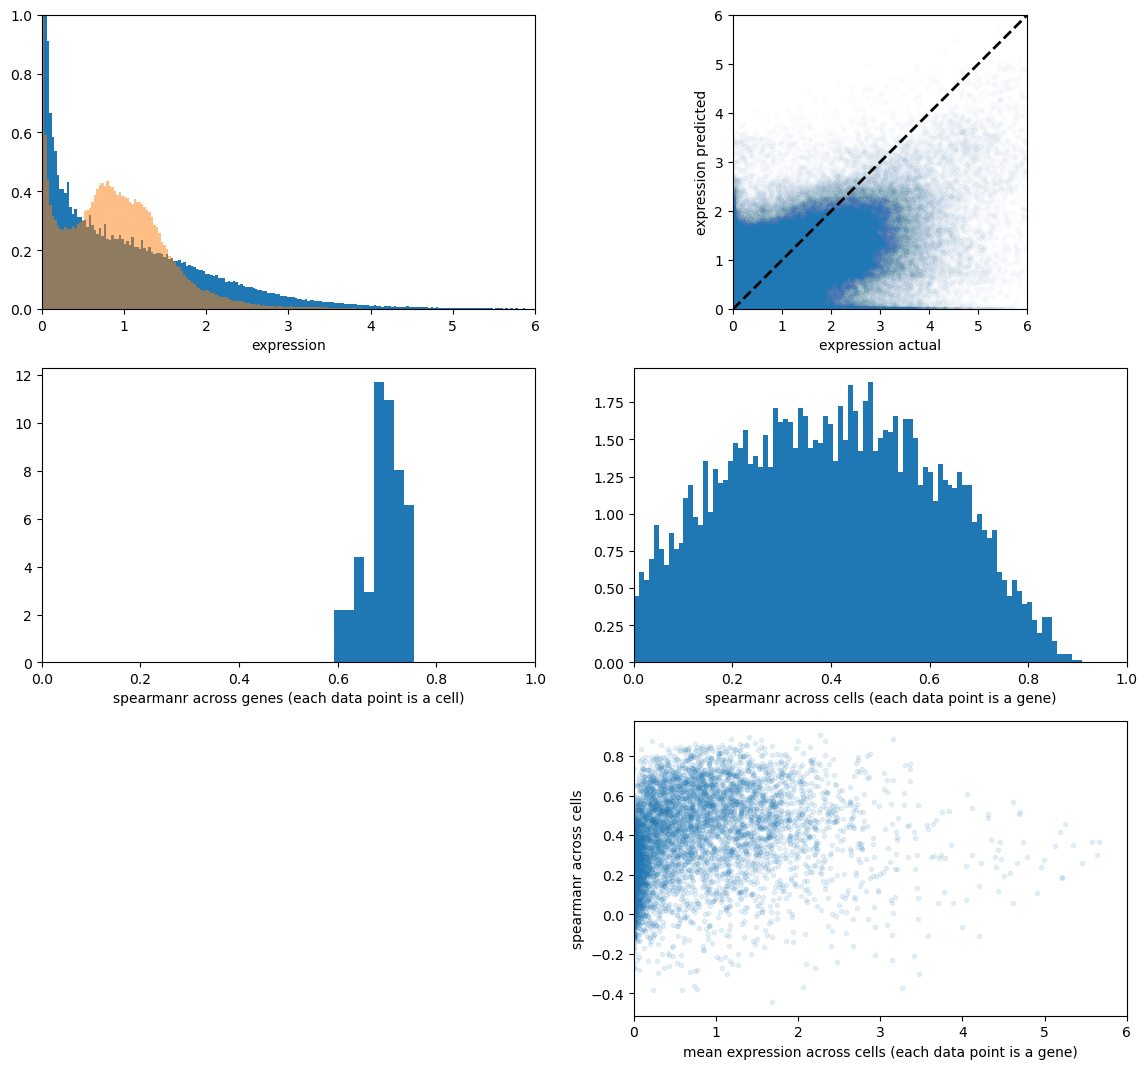

In [3]:
plot_expression_and_correlation(adata_test, results)

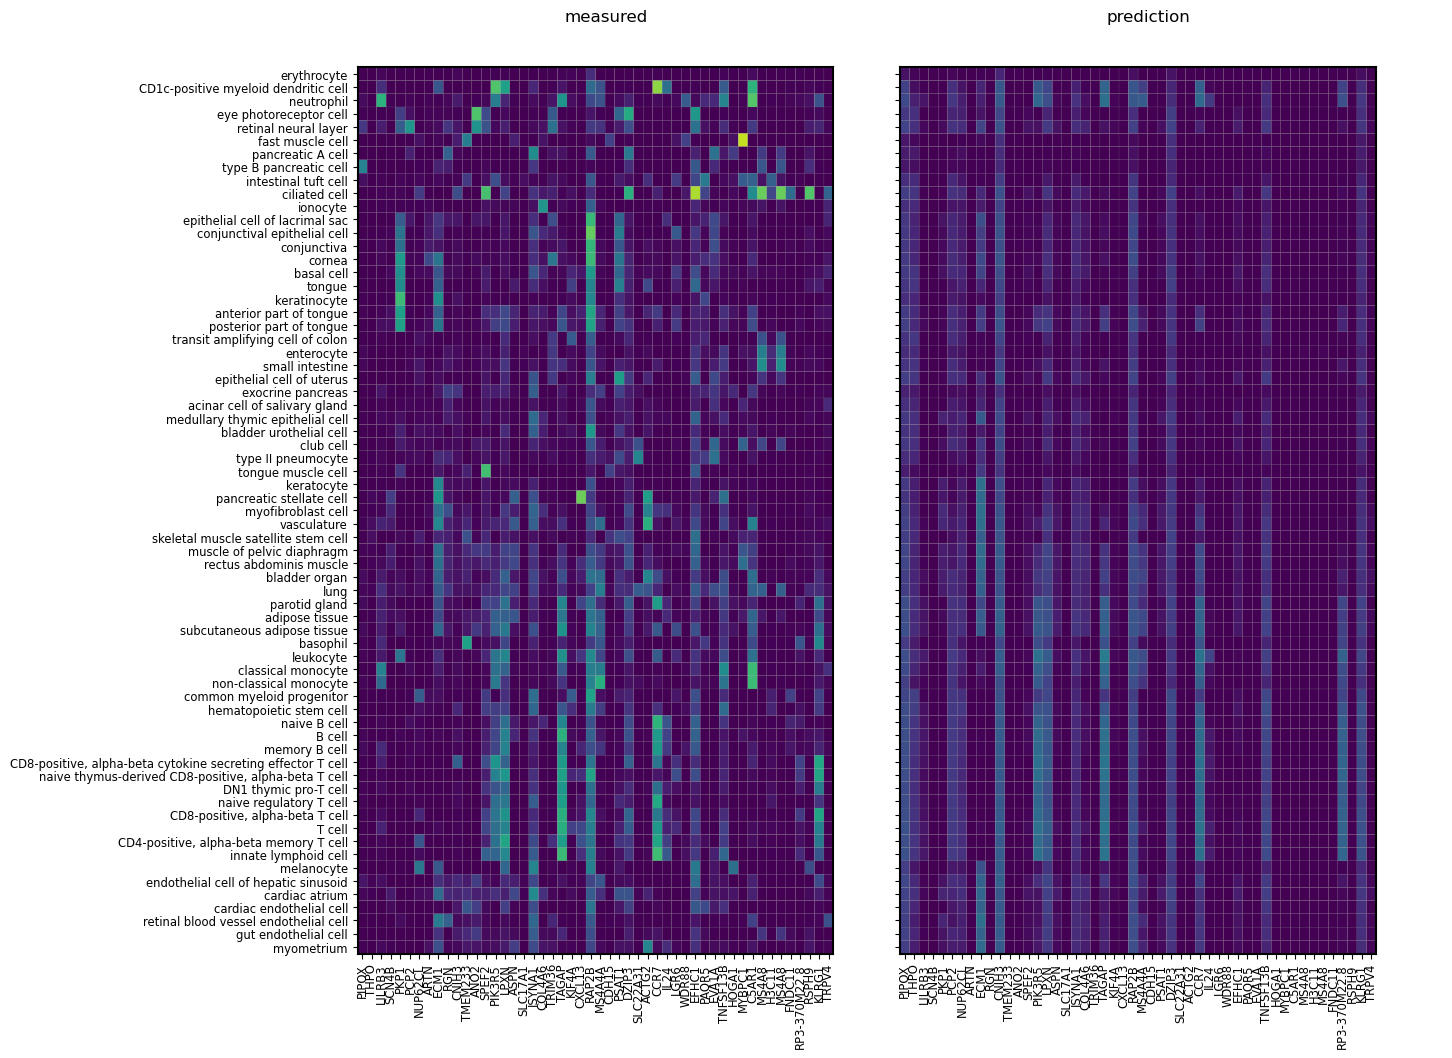

In [4]:
import numpy as np


marker_genes = adata_test.var[adata_test.var['highly_variable']]['feature_name'].values
np.random.seed(42)
marker_genes = np.random.choice(marker_genes, 50)

plot_marker_gene_heatmap(adata_test, marker_genes)

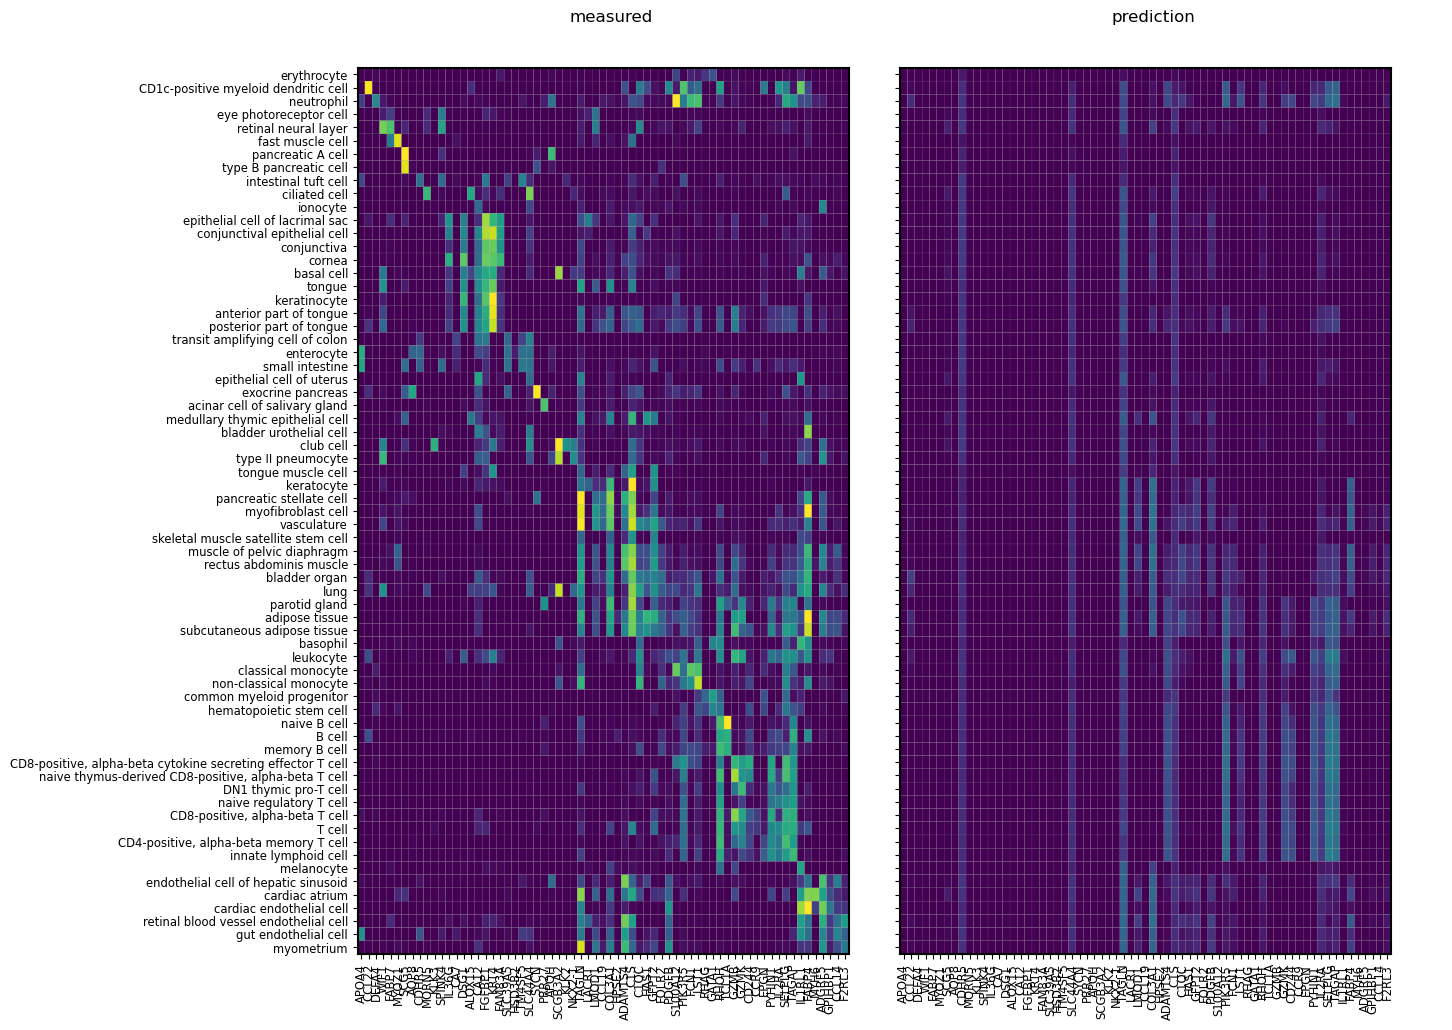

In [5]:
marker_genes_dict = adata_test.obs.set_index('label').to_dict()['marker_feature_name']
plot_marker_gene_heatmap(adata_test, marker_genes_dict)

In [6]:
adata_test.layers['prediction'][:, 2]

array([1.5185528 , 1.1430752 , 1.5175467 , 1.5056989 , 1.3943833 ,
       1.313767  , 1.5354555 , 0.6203116 , 1.0062766 , 1.1888129 ,
       1.5272889 , 1.524836  , 1.4814283 , 1.1976396 , 1.5365257 ,
       1.157595  , 0.99728984, 1.2655991 , 1.456886  , 1.0073383 ,
       1.3643615 , 1.2646614 , 1.4282824 , 1.1729068 , 1.3395761 ,
       1.3259827 , 1.6365466 , 1.3740188 , 1.2230942 , 1.4824175 ,
       1.2472206 , 1.2408957 , 1.3742616 , 1.2662654 , 1.2224194 ,
       1.4351612 , 1.1335564 , 1.6166272 , 1.2844126 , 1.3317168 ,
       1.4813876 , 0.9571596 , 1.2796131 , 1.0850226 , 1.2861542 ,
       0.9700979 , 1.1223767 , 0.89955026, 1.067641  , 1.3660728 ,
       1.2990011 , 1.5058324 , 1.1728535 , 1.008258  , 1.3908216 ,
       1.3811591 , 1.44333   , 1.2608861 , 1.4265075 , 1.400795  ,
       1.2255987 , 1.1886195 , 1.1725256 , 1.3692199 , 1.1116605 ,
       1.3478554 , 1.4650284 ], dtype=float32)

In [7]:
adata_test.layers

Layers with keys: binned, counts, log1p, normalized_counts, prediction